In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [24]:
import pandas as pd 

file = 'heart.csv'
df = pd.read_csv(file)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
print(df.isnull().sum())
df.info()
#No null values found, so we do not need to drop any rows.
#1025 rows and 14 columns

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
x = df.drop('target', axis=1)
y = df['target']


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [14]:
LogReg = LogisticRegression(max_iter=1000, random_state=42)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [11]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-0.12874356]
Coefficients [[-0.00673443 -0.83566545  0.88583501 -0.32005334 -0.44727634 -0.06268543
   0.14080389  0.65282635 -0.42023491 -0.7654063   0.34360461 -0.84752165
  -0.65685634]]


In [16]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))
#0 = no heart disease
#1 = heart disease
#precision = positive identifications
#recall = actual positives
#F1 score = weighted average of precision and recall

Accuracy 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [21]:
cr = classification_report(y_test, y_pred, output_dict=True)
cr

{'0': {'precision': 0.8488372093023255,
  'recall': 0.7156862745098039,
  'f1-score': 0.776595744680851,
  'support': 102.0},
 '1': {'precision': 0.7563025210084033,
  'recall': 0.8737864077669902,
  'f1-score': 0.8108108108108109,
  'support': 103.0},
 'accuracy': 0.7951219512195122,
 'macro avg': {'precision': 0.8025698651553644,
  'recall': 0.7947363411383971,
  'f1-score': 0.7937032777458309,
  'support': 205.0},
 'weighted avg': {'precision': 0.8023441707936719,
  'recall': 0.7951219512195122,
  'f1-score': 0.7937867291266357,
  'support': 205.0}}

Class 0:

    Precision 0.85,

    Recall 0.72,

    F1-score 0.78,

    102 samples,

Class 1:

    Precision 0.76,

    Recall 0.87,

    F1-score 0.81,

    103 samples,

Overall Accuracy - .795

0 = no heart disease

1 = heart disease

precision = positive identifications

recall = actual positives

F1 score = weighted average of precision and recall

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=LogReg.classes_)


<Figure size 800x600 with 0 Axes>

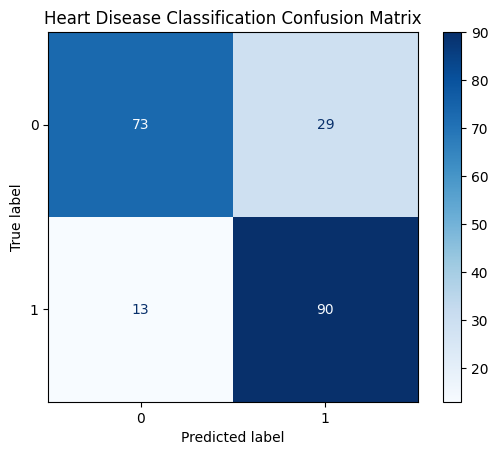

In [25]:
plt.figure(figsize=(8, 6))
conf_disp.plot(cmap='Blues')
plt.title("Heart Disease Classification Confusion Matrix")
plt.grid(False)
plt.show()

73 True Negatives with 13 False Negatives
29 False Positives with 90 True Positives